# __DICODING MACHINE LEARNING__
Nama : Fahmy Rosyadi <br>
Asal Instansi : Politeknik Negeri Jember
<br>
Proyek : Sentiment Analisis Ulasan Debat Pemilu 2024 Menggunakan NLP

## Load Dataset CSV dari Google Drive

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/DatasetCollab/UlasanDebat/UlasanDebatPemilu24.csv")
df.head(10)

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,Kategori
0,0,Fri Dec 15 04:04:44 +0000 2023,1.735511e+18,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",0.0,0,0.0,0.0,in,797761417894051840,1.735147e+18,MarahIchsan,https://twitter.com/MarahIchsan/status/1735511...,Capres
1,1,Fri Dec 15 04:04:33 +0000 2023,1.735511e+18,Suasana pedesaan memang selalu menyenangkan......,0.0,0,0.0,0.0,in,936445409605459968,1.735511e+18,Agung_wiyo,https://twitter.com/Agung_wiyo/status/17355111...,Capres
2,2,Fri Dec 15 04:04:31 +0000 2023,1.735511e+18,Program anies hanyalah mengubah nama rumah sak...,0.0,0,0.0,0.0,in,768652236,1.735511e+18,Alfakton_i,https://twitter.com/Alfakton_i/status/17355111...,Capres
3,3,Fri Dec 15 04:04:27 +0000 2023,1.735511e+18,@kumparan @aniesbaswedan anies... BERBOHONG DA...,0.0,0,0.0,0.0,in,1710823909275410432,1.735146e+18,justtheway333,https://twitter.com/justtheway333/status/17355...,Capres
4,4,Fri Dec 15 04:04:26 +0000 2023,1.735511e+18,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,0.0,0,1.0,1.0,in,1661757337554784264,1.735511e+18,singgihabdrchmn,https://twitter.com/singgihabdrchmn/status/173...,Capres
5,5,Fri Dec 15 04:04:25 +0000 2023,1.735511e+18,Prabowo Sindir Anies Baswedan: APBD Paling Bes...,0.0,1,1.0,1.0,in,1661757337554784264,1.735511e+18,singgihabdrchmn,https://twitter.com/singgihabdrchmn/status/173...,Capres
6,6,Fri Dec 15 04:04:15 +0000 2023,1.735511e+18,@hasyimmah Alesan harus jelas dan pak anies su...,0.0,0,0.0,1.0,in,3157194798,1.735192e+18,7f33229758ab489,https://twitter.com/7f33229758ab489/status/173...,Capres
7,7,Fri Dec 15 04:04:13 +0000 2023,1.735511e+18,@brochandra @ainunnajib Wow mantap sekali. Apa...,0.0,0,0.0,0.0,in,353739058,1.735453e+18,MisterMarmut,https://twitter.com/MisterMarmut/status/173551...,Capres
8,8,Fri Dec 15 04:04:12 +0000 2023,1.735511e+18,@ajengcute16__ saya dulu belajar majas kelas ...,0.0,0,0.0,0.0,in,1410420836499066883,1.735154e+18,id_edx,https://twitter.com/id_edx/status/173551104871...,Capres
9,9,Fri Dec 15 04:04:03 +0000 2023,1.735511e+18,"@tvOneNews Kasian kiki, padahal itu fakta, mem...",0.0,0,0.0,0.0,in,1596864352174604288,1.735465e+18,bimasakti_2013,https://twitter.com/bimasakti_2013/status/1735...,Capres


In [4]:
df = df[['full_text', 'username', 'Kategori','created_at']]
df

,full_text,username,Kategori,created_at
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...,...
2599,"@DokterTifa @cakimiNOW G msk akaaalllll, orang...",risnand59179688,Cawapres,Mon Dec 25 02:41:41 +0000 2023
2600,"@Heraloebss Bismillah.. Amin, Anies -Muhaimin ...",ado_ono,Cawapres,Mon Dec 25 02:40:45 +0000 2023
2601,"@Arie_Kriting Bismillah.. Amin, Anies -Muhaimi...",ado_ono,Cawapres,Mon Dec 25 02:39:01 +0000 2023
2602,"@VIVAcoid Bismillah.. Amin, Anies -Muhaimin P...",ado_ono,Cawapres,Mon Dec 25 02:35:11 +0000 2023


In [5]:
df.shape

(2604, 4)

## Lakukan Preprocessing Data

In [6]:
df = df.drop_duplicates(subset=['full_text'])

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

full_text     0
username      0
Kategori      0
created_at    0
dtype: int64

In [10]:
df.shape

(2557, 4)

In [11]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9+]',' ', text)
  text = re.sub(r'#\w+',' ', text)
  text = re.sub(r'RT[\s]+',' ',text)
  text = re.sub(r'https?://\S+',' ', text)

  text = re.sub(r'[^A-Za-z0-9]',' ',text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

In [12]:
df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [13]:
df['full_text'] = df['full_text'].str.lower()

In [14]:
df

,full_text,username,Kategori,created_at
0,edy pram pastilah prabowo anies nggak punya pr...,MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023
3,umparan niesbaswedan anies berbohong dan nipu ...,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...,...
2599,oktertifa akiminow g msk akaaalllll orang dita...,risnand59179688,Cawapres,Mon Dec 25 02:41:41 +0000 2023
2600,eraloebss bismillah amin anies muhaimin presid...,ado_ono,Cawapres,Mon Dec 25 02:40:45 +0000 2023
2601,rie kriting bismillah amin anies muhaimin pres...,ado_ono,Cawapres,Mon Dec 25 02:39:01 +0000 2023
2602,ivacoid bismillah amin anies muhaimin presiden...,ado_ono,Cawapres,Mon Dec 25 02:35:11 +0000 2023


In [15]:
norm = {"yg": "yang",'nggak': 'tidak', 'akaaalllll':'akal','msk':'masuk',"nipu":"menipu","tdk" : "tidak",'bangetdari': ' banget dari', "vibes" : "suasana","menilau" : "menilai", "mo" : "ingin"}

In [16]:
def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

In [24]:
df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,Kategori,created_at
0,edy pram pastilah prabowo anies punya prestasi,MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023
3,umparan niesbaswedan anies berbohong memenipu ...,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023
4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...,...
2599,oktertifa akiminow g masuk akal orang ditanya ...,risnand59179688,Cawapres,Mon Dec 25 02:41:41 +0000 2023
2600,eraloebss bismillah amin anies muhaimin presid...,ado_ono,Cawapres,Mon Dec 25 02:40:45 +0000 2023
2601,rie kriting bismillah amin anies muhaimin pres...,ado_ono,Cawapres,Mon Dec 25 02:39:01 +0000 2023
2602,ivacoid bismillah amin anies muhaimin presiden...,ado_ono,Cawapres,Mon Dec 25 02:35:11 +0000 2023


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.9 MB/s eta 0:00:00


In [25]:
#Stop Words
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak","yang","dan","di"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
new_stop_words_remover = StopWordRemover(new_array)

In [26]:
def stopword(str_text):
  str_text = new_stop_words_remover.remove(str_text)
  return str_text

In [27]:
df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,username,Kategori,created_at
0,edy pram pastilah prabowo anies punya prestasi,MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023
3,umparan niesbaswedan anies berbohong memenipu ...,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023
4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023


In [29]:
import googletrans as gt
from googletrans import Translator

In [30]:
def convert_eng(tweet):
    translator = Translator()
    translation = translator.translate(tweet, src='id', dest='en')
    return translation.text

In [ ]:
df['tweet_english'] = df['full_text'].apply(convert_eng)
df.to_csv('/content/drive/MyDrive/DatasetCollab/UlasanDebat/TranslateUlasanDebatPemilu.csv')

In [31]:
data = pd.read_csv('/content/drive/MyDrive/DatasetCollab/UlasanDebat/TranslateUlasanDebatPemilu.csv')
data.head(500)

,Unnamed: 0,full_text,username,Kategori,created_at,tweet_english
0,0,edy pram pastilah prabowo anies punya prestasi,MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023,Edy Pram must be Prabowo Anies has an achievement
1,1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023,The rural atmosphere is always pleased the fre...
2,2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023,Anies program is only changing the name of a h...
3,3,umparan niesbaswedan anies berbohong memenipu ...,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023,Anies Baswedan Anies coil lying to deceive guilt
4,4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023,Talk according to the facts of Anies Lantang T...
...,...,...,...,...,...,...
495,502,nlyfrens berarti jahat bukan anies rezim jokowi,armanhermawan3,Capres,Fri Dec 15 03:36:33 +0000 2023,Nlyfrens means evil not Anies Jokowi's regime
496,503,wan abud avatar legendaris sang pengendali ang...,salwaadheliaa,Capres,Fri Dec 15 03:36:29 +0000 2023,Wan Abud Avatar Legendary Sang Wind Controller...
497,504,anies baswedan hanya berbicara juga bertindak ...,BaktiPutra69,Capres,Fri Dec 15 03:36:22 +0000 2023,Anies Baswedan only spoke also acted to improv...
498,505,ganjar mahfud menang indonesia sat set berjaya...,SimpatisnGanjar,Capres,Fri Dec 15 03:36:19 +0000 2023,Ganjar Mahfud Winning Indonesia Sat Set Tag Ga...


In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as pre
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
      total_positif += 1
      status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
      total_netral += 1
      status.append('Netral')
    else:
      total_negatif += 1
      status.append('Negatif')
    total +=1

In [34]:
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'Total Data : {total}')

Hasil Analisis Data:
Positif = 1398
Netral = 857
Negatif = 302
Total Data : 2557


In [35]:
data['klasifikasi'] = status
data

,Unnamed: 0,full_text,username,Kategori,created_at,tweet_english,klasifikasi
0,0,edy pram pastilah prabowo anies punya prestasi,MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023,Edy Pram must be Prabowo Anies has an achievement,Netral
1,1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023,The rural atmosphere is always pleased the fre...,Positif
2,2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023,Anies program is only changing the name of a h...,Netral
3,3,umparan niesbaswedan anies berbohong memenipu ...,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023,Anies Baswedan Anies coil lying to deceive guilt,Netral
4,4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023,Talk according to the facts of Anies Lantang T...,Positif
...,...,...,...,...,...,...,...
2552,2599,oktertifa akiminow g masuk akal orang ditanya ...,risnand59179688,Cawapres,Mon Dec 25 02:41:41 +0000 2023,Ocktertive Akiminow doesn't make sense that pe...,Netral
2553,2600,eraloebss bismillah amin anies muhaimin presid...,ado_ono,Cawapres,Mon Dec 25 02:40:45 +0000 2023,Eraloebss Bismillah Amin Anies Muhaimin Presid...,Netral
2554,2601,rie kriting bismillah amin anies muhaimin pres...,ado_ono,Cawapres,Mon Dec 25 02:39:01 +0000 2023,Rie Kriting Bismillah Amin Anies Muhaimin Pres...,Netral
2555,2602,ivacoid bismillah amin anies muhaimin presiden...,ado_ono,Cawapres,Mon Dec 25 02:35:11 +0000 2023,Ivacoid Bismillah Amin Anies Muhaimin Presiden...,Netral


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2557 non-null   int64 
 1   full_text      2557 non-null   object
 2   username       2557 non-null   object
 3   Kategori       2557 non-null   object
 4   created_at     2557 non-null   object
 5   tweet_english  2557 non-null   object
 6   klasifikasi    2557 non-null   object
dtypes: int64(1), object(6)
memory usage: 140.0+ KB


In [37]:
data.klasifikasi.value_counts()

Positif    1398
Netral      857
Negatif     302
Name: klasifikasi, dtype: int64

In [38]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

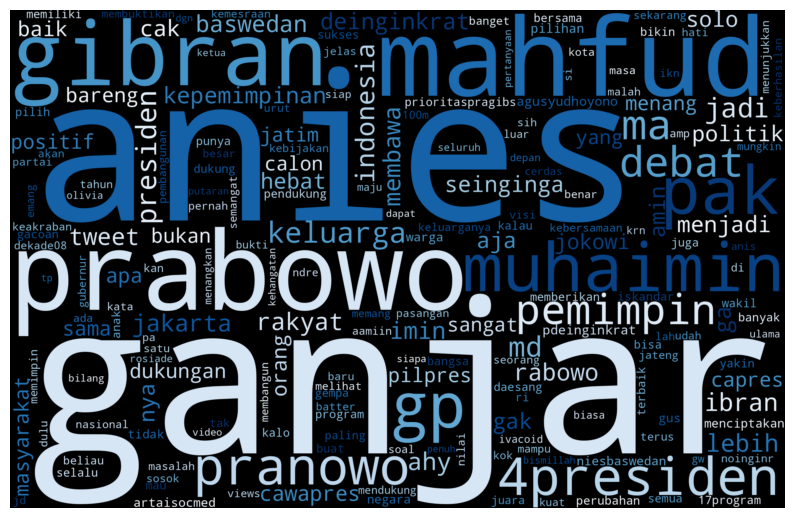

In [39]:
all_words = ' '.join([tweet for tweet in data['full_text']])

wordcloud = WordCloud(
    width = 2800,
    height = 1800,
    random_state=3,
    background_color='black',
    colormap = 'Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

## Pelabelan data hasil Preprocessing

In [40]:
from keras.layers import Input, LSTM, Bidirectional, SpatialDropout1D, Dropout, Flatten, Dense, Embedding, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# klasifikasi to one-hot-encoding
klasifikasi = pd.get_dummies(data.klasifikasi)
df_new = pd.concat([data, klasifikasi], axis=1)
df_new = df_new.drop(columns='klasifikasi')
df_new.head(10)

,Unnamed: 0,full_text,username,Kategori,created_at,tweet_english,Negatif,Netral,Positif
0,0,edy pram pastilah prabowo anies punya prestasi,MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023,Edy Pram must be Prabowo Anies has an achievement,0,1,0
1,1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023,The rural atmosphere is always pleased the fre...,0,0,1
2,2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023,Anies program is only changing the name of a h...,0,1,0
3,3,umparan niesbaswedan anies berbohong memenipu ...,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023,Anies Baswedan Anies coil lying to deceive guilt,0,1,0
4,4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023,Talk according to the facts of Anies Lantang T...,0,0,1
5,5,prabowo sindir anies baswedan apbd paling besa...,singgihabdrchmn,Capres,Fri Dec 15 04:04:25 +0000 2023,Prabowo Sindir Anies Baswedan APBD is the bigg...,0,0,1
6,6,asyimmah alesan jelas pak anies menjelaskan se...,7f33229758ab489,Capres,Fri Dec 15 04:04:15 +0000 2023,Ashimmah clear reasons Pak Anies explained as ...,1,0,0
7,7,rochandra inunnajib wow mantap sekali ini arti...,MisterMarmut,Capres,Fri Dec 15 04:04:13 +0000 2023,"Rochandra Inunnajib Wow This is great, meaning...",0,0,1
8,8,jengcute16 dulu belajar majas kelas 8 smp paha...,id_edx,Capres,Fri Dec 15 04:04:12 +0000 2023,Ajengcute16 used to learn majas 8th grade juni...,0,0,1
9,9,vonenews kasian kiki padahal fakta memang si a...,bimasakti_2013,Capres,Fri Dec 15 04:04:03 +0000 2023,Vonews is sorry for Kiki even though the fact ...,0,0,1


In [61]:
# change dataframe value to numpy array
text = df_new['full_text'].values
label = df_new[['Negatif', 	'Netral', 'Positif']].values

In [62]:
label.shape

(2557, 3)

## Split data train dan testing

In [63]:
# Split data into training and validation
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, shuffle=True)

In [64]:
label_train

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

## Pelatihan Model

In [66]:
# tokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [90]:
import tensorflow as tf
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5001, output_dim=100, input_length=None),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),metrics=['acc'], loss=CategoricalCrossentropy(),run_eagerly=True)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 100)         500100    
                                                                 
 lstm_6 (LSTM)               (None, 100)               80400     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 3)                 303       
                                                                 
Total params: 590903 (2.25 MB)
Trainable params: 590903 (2.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      accuracy = logs.get('acc')
      val_accuracy = logs.get('val_accuracy')
      if accuracy is not None and accuracy == 1.00:
        print("\nAkurasi telah mencapai 100%!")
        self.model.stop_training = True

callbacks = myCallback()

In [104]:
history = model.fit(padded_train, label_train, epochs=50,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks], validation_steps=30)

Epoch 1/50
64/64 - 19s - loss: 0.0035 - acc: 0.9985 - 19s/epoch - 292ms/step
Epoch 2/50
64/64 - 18s - loss: 0.0044 - acc: 0.9985 - 18s/epoch - 282ms/step
Epoch 3/50
64/64 - 19s - loss: 0.0020 - acc: 0.9990 - 19s/epoch - 289ms/step
Epoch 4/50
64/64 - 21s - loss: 0.0017 - acc: 0.9995 - 21s/epoch - 322ms/step
Epoch 5/50
64/64 - 19s - loss: 0.0015 - acc: 0.9990 - 19s/epoch - 295ms/step
Epoch 6/50
64/64 - 18s - loss: 0.0014 - acc: 0.9995 - 18s/epoch - 284ms/step
Epoch 7/50
64/64 - 18s - loss: 0.0029 - acc: 0.9985 - 18s/epoch - 283ms/step
Epoch 8/50
64/64 - 18s - loss: 0.0023 - acc: 0.9985 - 18s/epoch - 280ms/step
Epoch 9/50
64/64 - 18s - loss: 0.0016 - acc: 0.9995 - 18s/epoch - 289ms/step
Epoch 10/50
64/64 - 19s - loss: 0.0015 - acc: 0.9990 - 19s/epoch - 299ms/step
Epoch 11/50
64/64 - 18s - loss: 0.0011 - acc: 0.9995 - 18s/epoch - 289ms/step
Epoch 12/50
64/64 - 18s - loss: 0.0573 - acc: 0.9863 - 18s/epoch - 278ms/step
Epoch 13/50
64/64 - 18s - loss: 0.0983 - acc: 0.9731 - 18s/epoch - 275ms/

## Evaluasi Model

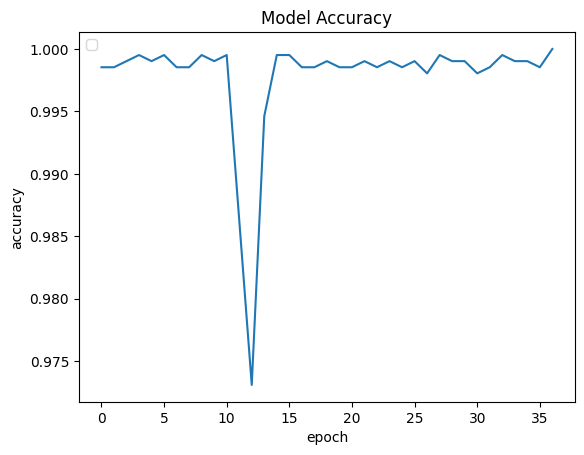

In [105]:
plt.plot(history.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()


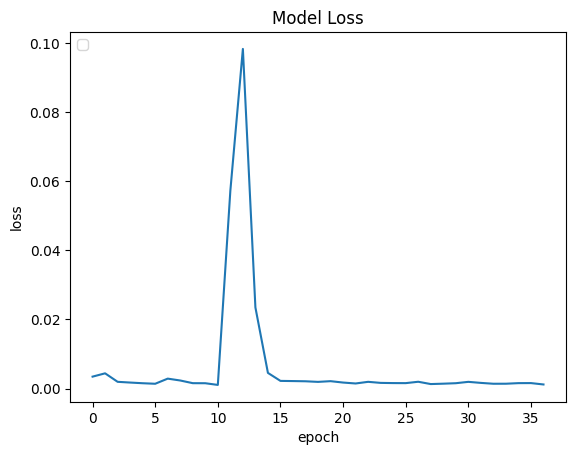

In [106]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

## Testing Model

In [135]:
import numpy as np

class_labels = ['Negatif', 'Netral', 'Positif']
label_predict_prob = model.predict(padded_test)
predicted_classes = np.argmax(label_predict_prob, axis=1)

threshold_positif = 0.5
threshold_netral = 0.5

predicted_labels = []

for prob in label_predict_prob:
    if prob[2] >= threshold_positif:
        predicted_labels.append('Positif')
    elif prob[1] >= threshold_netral:
        predicted_labels.append('Netral')
    else:
        predicted_labels.append('Negatif')

df_results = pd.DataFrame({
    'Text': text_test,
    'True_Label': [class_labels[np.argmax(label)] for label in label_test],
    'Predicted_Label': predicted_labels,
    'Probability': [max(prob) for prob in label_predict_prob]
})


16/16 [==============================] - 2s 103ms/step


In [138]:
df_results.head(15)

,Text,True_Label,Predicted_Label,Probability
0,solo punya gibran berhasil muhaimin sepertinya...,Positif,Positif,0.586863
1,keberhasilan mas ganjar pranowo membangun kelu...,Positif,Netral,1.000000
2,jengcute16 padhal mbak sy yakin pendidikannya ...,Positif,Negatif,0.667813
3,nnindonesia gus muhaimin hatinya sangat suci d...,Positif,Positif,0.999825
4,asosiasi guru ngaji agung tasikmalaya keluarga...,Netral,Netral,0.999987
5,asbil lbs niesbaswedan anies mah emg gabakalan...,Positif,Positif,0.999983
6,cuma orang bodoh gak waras aja ama celotehnya ...,Negatif,Negatif,1.000000
7,dri 7i llykoro bahasa template gibran prabowo ...,Netral,Netral,0.953867
8,mahfud md komitmen memberikan perlindungan pek...,Netral,Positif,0.999998
9,kenapa buzzer ganjar ngetag gw,Netral,Netral,0.993769
